# TITANIC: REGRESSION LOGISTIQUE

A FAIRE
recherche d'hyperparamètres
s'occuper des outliers
pour les titles supprimer si il yen a pas assez

POUR AFFICHER LES OPTIONS DUNE FONCTIONS MAJ TAB TAB

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
pd.set_option("display.max_rows",150)
pd.set_option("display.max_columns",150)

In [90]:
train = pd.read_csv("../Documents/titanic/train.csv")
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [91]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


# 1.) NETTOYAGE

In [92]:
train.info() 
#incomplete col ==> Age(moyenne ou catégorie spéciale genre np.nan), Cabin(on remplace par "NA"), Embarked(NA ou drop rows 2 ça passe)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [93]:
#CLEANING
train['Cabin'] = train['Cabin'].fillna("NA")
train['Embarked'] = train['Embarked'].fillna("NA")
train['Age'] = train['Age'].fillna(train['Age'].mean())
train = train[train['Embarked'] != "NA"]

# OUTLIERS

In [94]:
train = train.drop([297])

In [95]:
train[train['Sex'] == 'young child']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


# 2.) ANALYSE/VISUALISATION

# 2.1 Pclass

In [96]:
train.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629108
2    0.472826
3    0.242363
Name: Survived, dtype: float64

<BarContainer object of 3 artists>

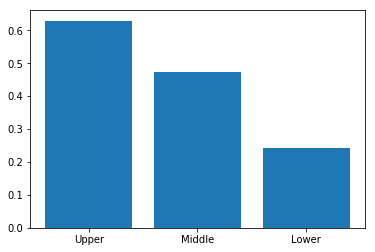

In [97]:
plt.bar(["Upper","Middle","Lower"], train.groupby('Pclass')['Survived'].mean())

<BarContainer object of 3 artists>

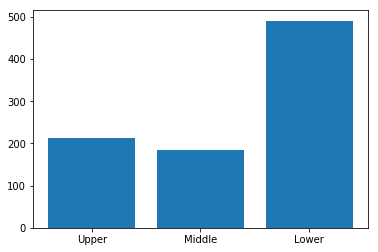

In [98]:
Pclass_repartition = train.groupby(['Pclass']).size()
plt.bar(["Upper","Middle","Lower"], Pclass_repartition)

# 2.3 Age/Sexe  + feature engineering

In [99]:
train.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742765
male      0.188908
Name: Survived, dtype: float64

In [100]:
train.groupby(['Age', 'Sex'])['Survived'].mean()

Age        Sex   
0.420000   male      1.000000
0.670000   male      1.000000
0.750000   female    1.000000
0.830000   male      1.000000
0.920000   male      1.000000
1.000000   female    1.000000
           male      0.600000
2.000000   female    0.400000
           male      0.250000
3.000000   female    0.500000
           male      1.000000
4.000000   female    1.000000
           male      0.400000
5.000000   female    1.000000
6.000000   female    0.500000
           male      1.000000
7.000000   female    1.000000
           male      0.000000
8.000000   female    0.500000
           male      0.500000
9.000000   female    0.000000
           male      0.500000
10.000000  female    0.000000
           male      0.000000
11.000000  female    0.000000
           male      0.333333
12.000000  male      1.000000
13.000000  female    1.000000
14.000000  female    0.750000
           male      0.000000
14.500000  female    0.000000
15.000000  female    1.000000
           male      0

In [101]:
train.groupby(['Age', 'Sex']).size()

Age        Sex   
0.420000   male        1
0.670000   male        1
0.750000   female      2
0.830000   male        2
0.920000   male        1
1.000000   female      2
           male        5
2.000000   female      5
           male        4
3.000000   female      2
           male        4
4.000000   female      5
           male        5
5.000000   female      4
6.000000   female      2
           male        1
7.000000   female      1
           male        2
8.000000   female      2
           male        2
9.000000   female      4
           male        4
10.000000  female      1
           male        1
11.000000  female      1
           male        3
12.000000  male        1
13.000000  female      2
14.000000  female      4
           male        2
14.500000  female      1
15.000000  female      4
           male        1
16.000000  female      6
           male       11
17.000000  female      6
           male        7
18.000000  female     13
           male       13
19.0000

In [102]:
train[train['Age'] < 13].groupby(['Sex'])['Survived'].mean()

Sex
female    0.612903
male      0.567568
Name: Survived, dtype: float64

In [103]:
train[train['Age'] > 13].groupby(['Sex'])['Survived'].mean()

Sex
female    0.755396
male      0.162963
Name: Survived, dtype: float64

In [104]:
#train['Age(range)'] = pd.cut(train['Age'], np.arange(13, 84, 5))
#train.groupby(['Age(range)', 'Sex'])['Survived'].mean()

In [105]:
#train.groupby(['Age(range)', 'Sex'])['Survived'].size()

In [106]:
#age feature engineering : enfants < 13 = unisex, range les ages d'enfants en trois
train['Sex'] = np.where(train['Age'] <= 12, "child", train['Sex'])
train['Sex'] = np.where(train['Age'] <= 6, "young child", train['Sex'])
train['Sex'] = np.where(train['Age'] <= 1, "baby", train['Sex'])

In [107]:
train.groupby(['Sex', 'Pclass'])['Survived'].mean()

Sex          Pclass
baby         1         1.000000
             2         1.000000
             3         0.750000
child        1         1.000000
             2         1.000000
             3         0.166667
female       1         0.978022
             2         0.911765
             3         0.504132
male         1         0.352941
             2         0.080808
             3         0.118012
young child  1         1.000000
             2         1.000000
             3         0.500000
Name: Survived, dtype: float64

# Name ==> LastName, Title

In [108]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NA,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NA,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NA,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NA,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",young child,2.000000,3,1,349909,21.0750,NA,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NA,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NA,C


In [109]:
train['LastName'] = train["Name"].str.split(",", n = 1, expand = True)[0] 
train['Title'] = train["Name"].str.split(".", n = 1, expand = True)[0]
train['Title'] = train["Title"].str.split(", ", n = 1, expand = True)[1]
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NA,S,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NA,S,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NA,S,Allen,Mr
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NA,Q,Moran,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,McCarthy,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",young child,2.000000,3,1,349909,21.0750,NA,S,Palsson,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NA,S,Johnson,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NA,C,Nasser,Mrs


In [110]:
"""names = train['LastName'].unique()
train['FamilyMembers'] = 0
for name in names:
    family_members = len(train[train['LastName'] == name]) - 1
    train['FamilyMembers'] = np.where(train['LastName'] == name, family_members, train['FamilyMembers'])
train['IsAlone'] = np.where(train['FamilyMembers'] < 1, 1, 0)"""  

"names = train['LastName'].unique()\ntrain['FamilyMembers'] = 0\nfor name in names:\n    family_members = len(train[train['LastName'] == name]) - 1\n    train['FamilyMembers'] = np.where(train['LastName'] == name, family_members, train['FamilyMembers'])\ntrain['IsAlone'] = np.where(train['FamilyMembers'] < 1, 1, 0)"

In [111]:
train['FamilyMembers'] = train['SibSp'] + train['Parch']
train['IsAlone'] = np.where(train['FamilyMembers'] < 1, 1, 0)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,FamilyMembers,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NA,S,Braund,Mr,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NA,S,Heikkinen,Miss,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Futrelle,Mrs,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NA,S,Allen,Mr,0,1
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NA,Q,Moran,Mr,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,McCarthy,Mr,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",young child,2.000000,3,1,349909,21.0750,NA,S,Palsson,Master,4,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NA,S,Johnson,Mrs,2,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NA,C,Nasser,Mrs,1,0


In [112]:
print(train.groupby(['Title'])['Survived'].mean())
print(train.groupby(['Title'])['Survived'].size())
print(train.groupby(['FamilyMembers', 'Sex'])['Survived'].mean())
print(train.groupby(['FamilyMembers', 'Sex'])['Survived'].size())
print(train.groupby(['IsAlone', 'Sex'])['Survived'].mean())

Title
Capt            0.000000
Col             0.500000
Don             0.000000
Dr              0.428571
Jonkheer        0.000000
Lady            1.000000
Major           0.500000
Master          0.575000
Miss            0.700000
Mlle            1.000000
Mme             1.000000
Mr              0.156673
Mrs             0.790323
Ms              1.000000
Rev             0.000000
Sir             1.000000
the Countess    1.000000
Name: Survived, dtype: float64
Title
Capt              1
Col               2
Don               1
Dr                7
Jonkheer          1
Lady              1
Major             2
Master           40
Miss            180
Mlle              2
Mme               1
Mr              517
Mrs             124
Ms                1
Rev               6
Sir               1
the Countess      1
Name: Survived, dtype: int64
FamilyMembers  Sex        
0              child          0.000000
               female         0.780488
               male           0.156098
               youn

# Cabin

In [113]:
regex = r'[A-Z]{1}(?=\d)'
oui = []
for col in train['Cabin']:
    try:
        oui.append(re.findall(regex, col)[0])
    except:
        oui.append("NA")
train['CabinIndex'] = oui

In [114]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,FamilyMembers,IsAlone,CabinIndex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NA,S,Braund,Mr,1,0,NA
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,1,0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NA,S,Heikkinen,Miss,0,1,NA
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Futrelle,Mrs,1,0,C
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NA,S,Allen,Mr,0,1,NA
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NA,Q,Moran,Mr,0,1,NA
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,McCarthy,Mr,0,1,E
7,8,0,3,"Palsson, Master. Gosta Leonard",young child,2.000000,3,1,349909,21.0750,NA,S,Palsson,Master,4,0,NA
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NA,S,Johnson,Mrs,2,0,NA
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NA,C,Nasser,Mrs,1,0,NA


In [115]:
print(train.groupby(['CabinIndex'])['Survived'].mean())
train.groupby(['CabinIndex'])['Survived'].size()

CabinIndex
A     0.466667
B     0.733333
C     0.603448
D     0.766667
E     0.757576
F     0.777778
G     0.285714
NA    0.301013
Name: Survived, dtype: float64


CabinIndex
A      15
B      45
C      58
D      30
E      33
F       9
G       7
NA    691
Name: Survived, dtype: int64

# 2.4 Sibsp/Parch

Eliminer la parentalité pour les enfants et créer un features nb de parents


In [116]:
train.groupby(['SibSp'])['Survived'].mean()

SibSp
0    0.343234
1    0.538462
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [117]:
train.groupby(['SibSp'])['Survived'].size()

SibSp
0    606
1    208
2     28
3     16
4     18
5      5
8      7
Name: Survived, dtype: int64

In [118]:
train.groupby(['Parch'])['Survived'].mean()

Parch
0    0.341716
1    0.550847
2    0.506329
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

In [119]:
train.groupby(['Parch'])['Survived'].size()

Parch
0    676
1    118
2     79
3      5
4      4
5      5
6      1
Name: Survived, dtype: int64

In [120]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,FamilyMembers,IsAlone,CabinIndex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NA,S,Braund,Mr,1,0,NA
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,1,0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NA,S,Heikkinen,Miss,0,1,NA
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Futrelle,Mrs,1,0,C
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NA,S,Allen,Mr,0,1,NA
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NA,Q,Moran,Mr,0,1,NA
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,McCarthy,Mr,0,1,E
7,8,0,3,"Palsson, Master. Gosta Leonard",young child,2.000000,3,1,349909,21.0750,NA,S,Palsson,Master,4,0,NA
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NA,S,Johnson,Mrs,2,0,NA
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NA,C,Nasser,Mrs,1,0,NA


# 3.)FEATURE ENGINEERING

# DROP & ENCODE

In [121]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,FamilyMembers,IsAlone,CabinIndex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NA,S,Braund,Mr,1,0,NA
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,1,0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NA,S,Heikkinen,Miss,0,1,NA
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Futrelle,Mrs,1,0,C
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NA,S,Allen,Mr,0,1,NA
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NA,Q,Moran,Mr,0,1,NA
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,McCarthy,Mr,0,1,E
7,8,0,3,"Palsson, Master. Gosta Leonard",young child,2.000000,3,1,349909,21.0750,NA,S,Palsson,Master,4,0,NA
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NA,S,Johnson,Mrs,2,0,NA
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NA,C,Nasser,Mrs,1,0,NA


In [122]:
features_to_encode = ['Pclass', 'Sex', 'CabinIndex']
features_to_definitly_drop = ['PassengerId', 'Name']
features_to_drop_now = ['Age', 'Ticket', 'Cabin', 'Embarked', 'Fare', 'SibSp', 'Parch', 'LastName', 'FamilyMembers', 'Title']

In [123]:
def encode(df, features):
    for feature in features:
        to_encode = df.copy()
        encoded = pd.get_dummies(to_encode[feature], prefix = feature)
        df = pd.concat([df, encoded], axis=1, sort=False)
    df = df.drop(columns = features)
    return df
df = encode(train, features_to_encode)
drop_features = features_to_definitly_drop + features_to_drop_now
df = df.drop(columns = drop_features)

In [124]:
df

,Survived,IsAlone,Pclass_1,Pclass_2,Pclass_3,Sex_baby,Sex_child,Sex_female,Sex_male,Sex_young child,CabinIndex_A,CabinIndex_B,CabinIndex_C,CabinIndex_D,CabinIndex_E,CabinIndex_F,CabinIndex_G,CabinIndex_NA
0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
3,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
5,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
6,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
7,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
8,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
9,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [125]:
list(df.columns)

['Survived',
 'IsAlone',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Sex_baby',
 'Sex_child',
 'Sex_female',
 'Sex_male',
 'Sex_young child',
 'CabinIndex_A',
 'CabinIndex_B',
 'CabinIndex_C',
 'CabinIndex_D',
 'CabinIndex_E',
 'CabinIndex_F',
 'CabinIndex_G',
 'CabinIndex_NA']

# SPLIT

In [126]:
train1, test1 = train_test_split(df, test_size = 0.3)

# MODELE

In [127]:
features = list(df.columns)
features.remove('Survived')

In [128]:
#LOGISTIQUE
clf = LogisticRegression().fit(train1[features], train1['Survived'])
preds = clf.predict(test1[features])
metrics.confusion_matrix(test1['Survived'], preds)

array([[141,  29],
       [ 25,  72]], dtype=int64)

In [129]:
tn, fp, fn, tp = metrics.confusion_matrix(test1['Survived'], preds).ravel()
tn, fp, fn, tp

(141, 29, 25, 72)

In [130]:
metrics.accuracy_score(test1['Survived'], preds) #accuracy = bonnes_prédictions/prédictions 

0.797752808988764

In [131]:
#DECISION TREE
classifier = DecisionTreeClassifier().fit(train1[features], train1['Survived'])
preds2 = classifier.predict(test1[features])
metrics.confusion_matrix(test1['Survived'], preds2)

array([[159,  11],
       [ 34,  63]], dtype=int64)

In [132]:
metrics.accuracy_score(test1['Survived'], preds2)

0.8314606741573034

# RECHERCHE HYPERPARAMETRES

In [133]:
logistic_parameters = {'penalty': ['l2', 'l2'], 'C':[0.012 ,0.025,0.05, 0.1, 0.5]}

logi_opt = GridSearchCV(clf, logistic_parameters, cv=5)
logi_opt.fit(train1[features], train1['Survived'])
p_logi = logi_opt.predict(test1[features])

print("LOGISTIQUE")
print(metrics.accuracy_score(test1['Survived'], p_logi))
print(pd.crosstab(test1['Survived'], p_logi))  
print(logi_opt.best_params_)

tree_paramters = {'min_samples_split' : range(10,500,20),'max_depth': range(1,100,2)}
tree_opt = GridSearchCV(classifier, tree_paramters, cv = 5)
tree_opt.fit(train1[features], train1['Survived'])
p_tree = tree_opt.predict(test1[features])

print("TREE")
print(metrics.accuracy_score(test1['Survived'], p_tree))
print(pd.crosstab(test1['Survived'], p_tree))  
print(tree_opt.best_params_)

LOGISTIQUE
0.797752808988764
col_0       0   1
Survived         
0         149  21
1          33  64
{'C': 0.1, 'penalty': 'l2'}
TREE
0.8277153558052435
col_0       0   1
Survived         
0         158  12
1          34  63
{'max_depth': 7, 'min_samples_split': 30}


# ENTRAINEMENT SUR TOUT LE TESTSET

In [134]:
logistic_parameters = {'penalty': ['l2', 'l2'], 'C':[0.012 ,0.025,0.05, 0.1, 0.5]}

logi_opt = GridSearchCV(clf, logistic_parameters, cv=5)
logi_opt.fit(df[features], df['Survived'])
p_logi = logi_opt.predict(df[features])

print("LOGISTIQUE")
print(metrics.accuracy_score(df['Survived'], p_logi))
print(pd.crosstab(df['Survived'], p_logi))  
print(logi_opt.best_params_)

tree_paramters = {'min_samples_split' : range(10,500,20),'max_depth': range(1,100,2)}
tree_opt = GridSearchCV(classifier, tree_paramters, cv = 5)
tree_opt.fit(df[features], df['Survived'])
p_tree = tree_opt.predict(df[features])

print("TREE")
print(metrics.accuracy_score(df['Survived'], p_tree))
print(pd.crosstab(df['Survived'], p_tree))  
print(tree_opt.best_params_)

LOGISTIQUE
0.7995495495495496
col_0       0    1
Survived          
0         480   68
1         110  230
{'C': 0.05, 'penalty': 'l2'}
TREE
0.8265765765765766
col_0       0    1
Survived          
0         508   40
1         114  226
{'max_depth': 7, 'min_samples_split': 70}


# Preparing kaggle test set

In [135]:
test = pd.read_csv("../Documents/titanic/test.csv")

In [136]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [137]:
#CLEANING
test['Age'] = test['Age'].fillna(test['Age'].mean())
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())
test['Cabin'] = test['Cabin'].fillna("NA")
#CREATING FEATURES
test['Sex'] = np.where(test['Age'] <= 12, "child", test['Sex'])
test['Sex'] = np.where(test['Age'] <= 6, "young child", test['Sex'])
test['Sex'] = np.where(test['Age'] <= 1, "baby", test['Sex'])

test['LastName'] = test["Name"].str.split(",", n = 1, expand = True)[0] 
test['Title'] = test["Name"].str.split(".", n = 1, expand = True)[0]
test['Title'] = test["Title"].str.split(", ", n = 1, expand = True)[1]

test['FamilyMembers'] = test['SibSp'] + test['Parch']
test['IsAlone'] = np.where(test['FamilyMembers'] < 1, 1, 0)

regex = r'[A-Z]{1}(?=\d)'
oui = []
for col in test['Cabin']:
    try:
        oui.append(re.findall(regex, col)[0])
    except:
        oui.append("NA")
test['CabinIndex'] = oui
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,FamilyMembers,IsAlone,CabinIndex
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,NA,Q,Kelly,Mr,0,1,NA
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,NA,S,Wilkes,Mrs,1,0,NA
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,NA,Q,Myles,Mr,0,1,NA
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,NA,S,Wirz,Mr,0,1,NA
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,NA,S,Hirvonen,Mrs,2,0,NA
5,897,3,"Svensson, Mr. Johan Cervin",male,14.00000,0,0,7538,9.2250,NA,S,Svensson,Mr,0,1,NA
6,898,3,"Connolly, Miss. Kate",female,30.00000,0,0,330972,7.6292,NA,Q,Connolly,Miss,0,1,NA
7,899,2,"Caldwell, Mr. Albert Francis",male,26.00000,1,1,248738,29.0000,NA,S,Caldwell,Mr,2,0,NA
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.00000,0,0,2657,7.2292,NA,C,Abrahim,Mrs,0,1,NA
9,901,3,"Davies, Mr. John Samuel",male,21.00000,2,0,A/4 48871,24.1500,NA,S,Davies,Mr,2,0,NA


In [138]:
features_to_encode = ['Pclass', 'Sex', 'CabinIndex']
features_to_definitly_drop = ['Name']
features_to_drop_now = ['Age', 'Ticket', 'Cabin', 'Embarked', 'Fare', 'SibSp', 'Parch', 'LastName', 'FamilyMembers', 'Title']
test = encode(test, features_to_encode)
drop_features = features_to_definitly_drop + features_to_drop_now
test = test.drop(columns = drop_features)
features = list(test.columns)
features.remove('PassengerId')
test
features

['IsAlone',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Sex_baby',
 'Sex_child',
 'Sex_female',
 'Sex_male',
 'Sex_young child',
 'CabinIndex_A',
 'CabinIndex_B',
 'CabinIndex_C',
 'CabinIndex_D',
 'CabinIndex_E',
 'CabinIndex_F',
 'CabinIndex_G',
 'CabinIndex_NA']

In [139]:
predictions = tree_opt.predict(test[features])
predictions

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [140]:
submission = pd.DataFrame(data={'PassengerId':test['PassengerId'],'Survived':predictions})
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [141]:
submission.to_csv('kaggle_submit.csv', index=False)